In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available devices:")
print(tf.config.list_physical_devices())

TensorFlow version: 2.16.2
Available devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


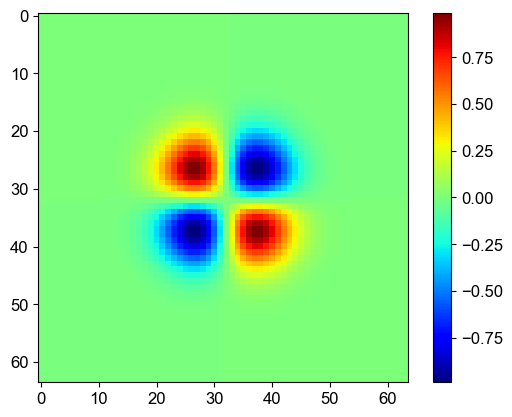

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

modes = loadmat('/Users/firdevsyuce/Desktop/bora_svmodes/modes.mat')['phi1']
modes = np.transpose(modes, (2, 0, 1))
modes = modes[:, ::8, ::8]
E_modes = (modes[:120])
plt.imshow((E_modes[4]), cmap='jet')
plt.colorbar()

In [ ]:
import os
import scipy.io as sio

Eint_folder = "/Users/firdevsyuce/Desktop/2025 LPT/Why optics need mode/sinc bpm/sinc final/sinc_data.npy"

Eint_fields = np.load(Eint_folder, allow_pickle=True)
print(f"Loaded {len(Eint_fields)} mat files.")
print("Shape of first field:", Eint_fields[0].shape)

Loaded 500 mat files.
Shape of first field: (64, 64)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mode_decomposition(E_MMF, E_modes, dx=1.0, dy=1.0):


    N_modes = len(E_modes)
    a = np.zeros(N_modes, dtype=complex) # coefficient matrix per mode
    K = np.zeros(N_modes)

    # Compute normalization and coefficients
    for i in range(N_modes):
        Ei = E_modes[i]
        K[i] = np.sum(np.abs(Ei)**2) * dx * dy #modes are treated as an orthonormal basis
        a[i] = np.sum(E_MMF * np.conj(Ei)) * dx * dy / K[i]

    # Compute normalized modal powers
    power = np.abs(a)**2 * K
    power_frac = power / np.sum(power)

    # Reconstruct total field from modes
    E_reconstructed = np.zeros_like(E_MMF, dtype=complex)
    for i in range(N_modes):
        E_reconstructed += a[i] * E_modes[i]

    return a, power_frac, E_reconstructed


if __name__ == "__main__":
    nx, ny = 64, 64
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y)


    # Perform decomposition
    num_speckles = len(Eint_fields)               # change to your actual number
    N_modes = len(E_modes)
    coeff_matrix = np.zeros((num_speckles, N_modes), dtype=complex)
    power_frac_all = np.zeros((num_speckles, N_modes), dtype=complex)
    reconstructed_fields = []

    for idx, Eint in enumerate(Eint_fields):


        a, power_frac, E_rec = mode_decomposition(Eint, E_modes, dx=x[1]-x[0], dy=y[1]-y[0])
        coeff_matrix[idx, :] = a # coefficient matrix for all speckles
        power_frac_all[idx, :] = power_frac
        reconstructed_fields.append(E_rec)

    reconstructed_fields = np.array(reconstructed_fields)

    #np.save("/Users/firdevsyuce/Desktop/2025 LPT/Why optics need mode/coeff matrix/coeff_matrix_sinc_speckle.npy",
        #3coeff_matrix)
    #np.save("/Users/firdevsyuce/Desktop/2025 LPT/Why optics need mode/coeff matrix/power_fraction_sinc.npy", power_frac_all)





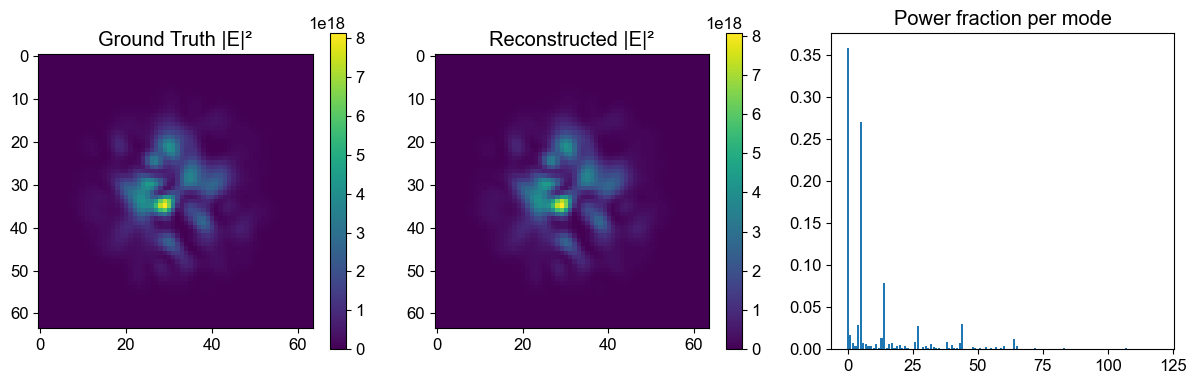

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
speckle_number = int(40)
# First image
im0 = axs[0].imshow(np.abs(Eint_fields[speckle_number])**2)
axs[0].set_title("Ground Truth |E|²")
fig.colorbar(im0, ax=axs[0])

# Second image
im1 = axs[1].imshow(np.abs(reconstructed_fields[speckle_number])**2)
axs[1].set_title("Reconstructed |E|²")
fig.colorbar(im1, ax=axs[1])

# Bar plot (no colorbar needed)
axs[2].bar(range(len(a)), power_frac_all[speckle_number])
axs[2].set_title("Power fraction per mode")

plt.tight_layout()
plt.show()


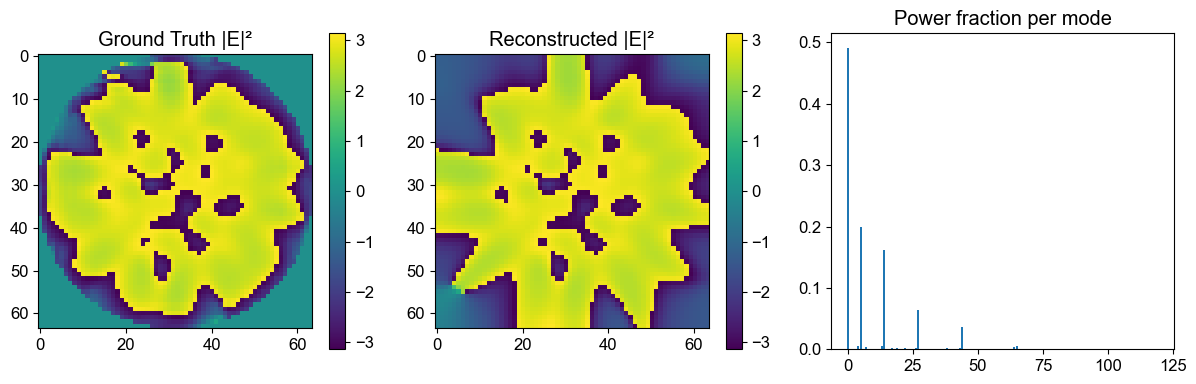

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
speckle_number = int(2)
# First image
im0 = axs[0].imshow(np.angle(Eint_fields[speckle_number]))
axs[0].set_title("Ground Truth |E|²")
fig.colorbar(im0, ax=axs[0])

# Second image
im1 = axs[1].imshow(np.angle(reconstructed_fields[speckle_number]))
axs[1].set_title("Reconstructed |E|²")
fig.colorbar(im1, ax=axs[1])

# Bar plot (no colorbar needed)
axs[2].bar(range(len(a)), power_frac_all[speckle_number])
axs[2].set_title("Power fraction per mode")

plt.tight_layout()
plt.show()

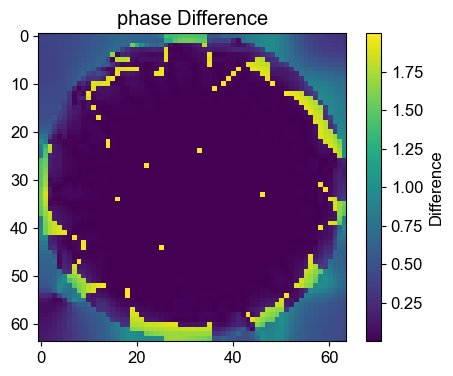

In [ ]:
diff_phase = np.abs((np.angle(reconstructed_fields[speckle_number])/np.max(np.angle(reconstructed_fields[speckle_number]))) - (np.angle(Eint_fields[speckle_number])/np.max(np.angle(Eint_fields[speckle_number]))))

plt.figure(figsize=(5,4))
plt.imshow(diff_phase)
plt.title("phase Difference" )
plt.colorbar(label='Difference')
plt.show()

In [ ]:
row = power_frac_all[50]
sorted_idx = np.argsort(row)[::-1]

sorted_vals = row[sorted_idx]

print("Sorted indices:", sorted_idx)
print("Sorted values:", sorted_vals)

Sorted indices: [  0   5  14  27  44   4  13  65  64   7  26  43  38  17   1  19  22  32
  60  16  30  40  21  29  48 107  10  72  34  18  23   6  41  11   8  59
  33  52  66  37  57  39   3   2   9  83  55  15  49  31  91  20  42  73
  12  53  36  54  90  50  58  79  61  35  82  56  94  88  76  80  47  81
  92  87  25  85  68  62 108  71  77  24  95  51  45  86  63  46  70  78
  93  74  28  75  98  89 112 110 119  96 109 114  99 113 117 101 106  67
 104 116  69 103 105 100 102  97  84 118 111 115]
Sorted values: [5.00854301e-01+0.j 2.08926336e-01+0.j 1.50759330e-01+0.j
 5.70257526e-02+0.j 3.34268599e-02+0.j 5.24649265e-03+0.j
 4.53530730e-03+0.j 4.44330513e-03+0.j 3.23997456e-03+0.j
 2.77215232e-03+0.j 2.67786651e-03+0.j 2.11686189e-03+0.j
 1.86707728e-03+0.j 1.72271095e-03+0.j 1.47920155e-03+0.j
 1.36152897e-03+0.j 1.29289020e-03+0.j 1.20811765e-03+0.j
 8.59845583e-04+0.j 7.69736989e-04+0.j 7.40976144e-04+0.j
 7.21049734e-04+0.j 6.85362024e-04+0.j 5.33145459e-04+0.j
 4.94000235e-04+0

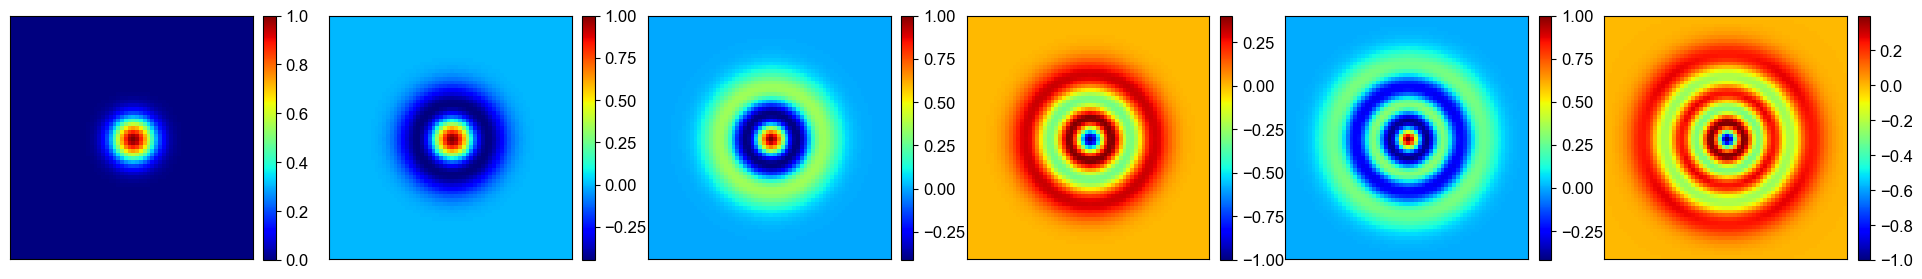

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(24, 4))
im0 = axs[0].imshow(np.abs(E_modes[0])**2, cmap = "jet")
fig.colorbar(im0, ax=axs[0], fraction = 0.046, pad = 0.04)
im1 = axs[1].imshow((E_modes[5]), cmap = "jet")
fig.colorbar(im1, ax=axs[1], fraction = 0.046, pad = 0.04)
im2 = axs[2].imshow((E_modes[14]), cmap = "jet")
fig.colorbar(im2, ax=axs[2], fraction = 0.046, pad = 0.04)
im3 = axs[3].imshow((E_modes[27]), cmap = "jet")
fig.colorbar(im3, ax=axs[3],fraction = 0.046, pad = 0.04)
im4 = axs[4].imshow((E_modes[44]), cmap = "jet")
fig.colorbar(im4, ax=axs[4], fraction = 0.046, pad = 0.04)
im5 = axs[5].imshow((E_modes[65]), cmap = "jet")
fig.colorbar(im5, ax=axs[5], fraction = 0.046, pad = 0.04)
for j in range(6):
    axs[j].set_xticks([])
    axs[j].set_yticks([])
    axs[j].set_xticklabels([])
    axs[j].set_yticklabels([])
plt.savefig('test.pdf', bbox_inches = 'tight', format = "pdf")



In [ ]:
abs_vals = np.abs(power_frac_all)
mode_totals = abs_vals.sum(axis=0)   # sum over speckles
sorted_indices = np.argsort(mode_totals)[::-1]
sorted_power = abs_vals[:, sorted_indices]


In [ ]:
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i+1}: Mode {idx}, Total Power = {mode_totals[idx]:.4f}")

Rank 1: Mode 0, Total Power = 195.1392
Rank 2: Mode 5, Total Power = 113.4003
Rank 3: Mode 14, Total Power = 57.7159
Rank 4: Mode 27, Total Power = 24.1746
Rank 5: Mode 44, Total Power = 16.1430
Rank 6: Mode 4, Total Power = 10.8001
Rank 7: Mode 1, Total Power = 7.2942
Rank 8: Mode 64, Total Power = 4.3767
Rank 9: Mode 13, Total Power = 4.1795
Rank 10: Mode 2, Total Power = 3.3724
Rank 11: Mode 38, Total Power = 3.3220
Rank 12: Mode 6, Total Power = 3.1477
Rank 13: Mode 26, Total Power = 2.8540
Rank 14: Mode 16, Total Power = 2.7830
Rank 15: Mode 8, Total Power = 2.6858
Rank 16: Mode 20, Total Power = 2.6287
Rank 17: Mode 17, Total Power = 2.5933
Rank 18: Mode 11, Total Power = 2.5287
Rank 19: Mode 32, Total Power = 2.4672
Rank 20: Mode 43, Total Power = 2.3904
Rank 21: Mode 7, Total Power = 2.1790
Rank 22: Mode 3, Total Power = 2.1441
Rank 23: Mode 40, Total Power = 2.1359
Rank 24: Mode 65, Total Power = 2.1209
Rank 25: Mode 9, Total Power = 1.6124
Rank 26: Mode 60, Total Power = 1.38

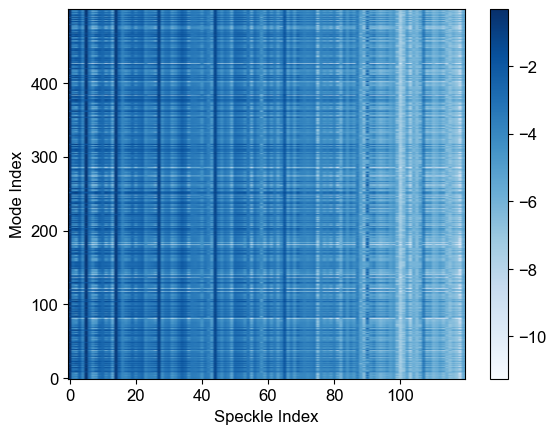

In [ ]:
plt.imshow((np.log10(abs)), aspect='auto', cmap='Blues', origin='lower')
plt.colorbar()
plt.xlabel('Speckle Index')
plt.ylabel('Mode Index')
plt.show()